# USD/BRL analysis since 2004

##Importing Libraries

In [42]:
"""
To work with data:
"""
import pandas as pd
"""
To work with arrays:
"""
import numpy as np
"""
To work with graphs:
"""
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter

##Importing data

In [43]:
Data = pd.read_csv("/content/USD_BRL Historical Data.csv")
Data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/16/2023,5.2285,5.2884,5.3117,5.2221,NaN,-1.13%
1,03/15/2023,5.2882,5.2539,5.3289,5.2505,NaN,0.65%
2,03/14/2023,5.2543,5.2472,5.2629,5.2208,NaN,0.16%
3,03/13/2023,5.2459,5.2171,5.2835,5.2106,NaN,0.56%
4,03/10/2023,5.2166,5.1650,5.2216,5.1509,NaN,1.01%


##Data selection

In [44]:
Data = Data[["Date", "Price"]]
Data.head()

,Date,Price
0,03/16/2023,5.2285
1,03/15/2023,5.2882
2,03/14/2023,5.2543
3,03/13/2023,5.2459
4,03/10/2023,5.2166


##Data preprocessing

In [45]:
Data["Date"] = pd.to_datetime(Data["Date"])
Data.head()

<ipython-input-45-754ffb705c07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Date"] = pd.to_datetime(Data["Date"])


,Date,Price
0,2023-03-16,5.2285
1,2023-03-15,5.2882
2,2023-03-14,5.2543
3,2023-03-13,5.2459
4,2023-03-10,5.2166


In [46]:
#NAN data
Data.isna().sum()

,0
Date,0
Price,0


###Division by President

In [47]:
Lula = Data[Data["Date"] < "2011-01-01"]
Dilma = Data[(Data["Date"] >= "2011-01-01") & (Data["Date"] < "2016-08-31")]
Temer = Data[(Data["Date"] >= "2016-08-31") & (Data["Date"] < "2019-01-01")]
Bolsonaro = Data[(Data["Date"] >= "2019-01-01") & (Data["Date"] < "2023-01-01")]
Lula_atual = Data[Data["Date"] >= "2023-01-01"]

##Ghaph

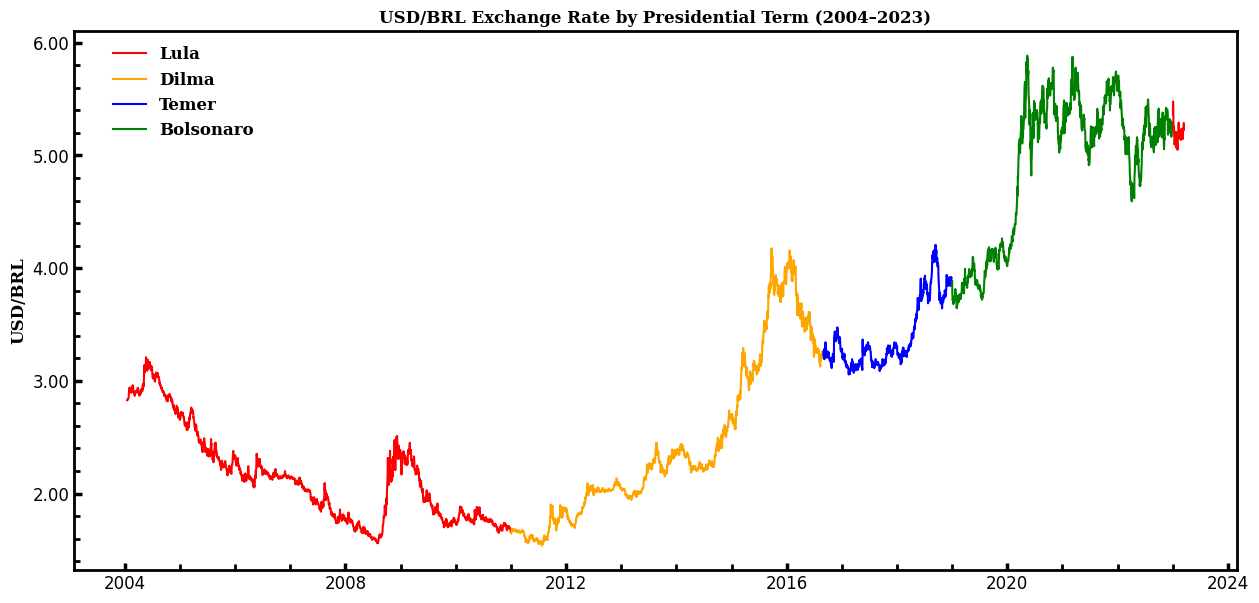

In [50]:
"""
Creation of the first text font to be used for axis labels
"""
font1 = {"family": "serif", "weight": "bold", "color": "black", "size": 12}

"""
Creation of the second text font to be used for the legend
"""
font2 = FontProperties(family = "serif",
                       weight = "bold",
                       size = 12)

"""
Creates a 'space' with size (15, 7) to allocate the figure
"""
fig, axs = plt.subplots(figsize = (15, 7))

"""
Plots a line chart between cumulative cases and cumulative deaths
"""
axs.plot(Lula["Date"],
         Lula["Price"],
         color = "red")
axs.plot(Dilma["Date"],
         Dilma["Price"],
         color = "orange")
axs.plot(Temer["Date"],
         Temer["Price"],
         color = "blue")
axs.plot(Bolsonaro["Date"],
         Bolsonaro["Price"],
         color = "green")
axs.plot(Lula_atual["Date"],
         Lula_atual["Price"],
         color = "red")
axs.grid(False)

"""
Setting the thickness and color of the axes
"""
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("black")

"""
Adjusting the graph ticks
"""
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "black", labelsize = 12, left = True, bottom = True, top = False, right = False)
axs.tick_params(which = "major", direction = "in", color = "black", length = 5.4, width = 2.5, left = True, bottom = True, top = False, right = False)
axs.tick_params(which = "minor", direction = "in", color = "black", length=4, width = 2, left = True, bottom = True, top = False, right = False)

"""
Axis labels
"""
axs.set_ylabel("USD/BRL", fontdict = font1)
"""
formatter of the y-axis
"""
formatter = FuncFormatter(lambda x, _: f"{x:.2f}")
axs.yaxis.set_major_formatter(formatter)

"""
plt.rcParams["axes.labelweight"] = "bold" makes axis numbers bold
"""
plt.rcParams["axes.labelweight"] = "bold"

"""
Setting a white background for the figure
"""
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)

"""
Legend
"""
axs.legend(["Lula", "Dilma", "Temer", "Bolsonaro"],
           prop = font2,
           frameon=False,
           loc='upper left',
           bbox_to_anchor=(0.02, 1))
"""
Title
"""
plt.title("USD/BRL Exchange Rate by Presidential Term (2004–2023)", fontdict = font1)
"""
Show the graph:
"""
plt.show()